# Homework 01 - Random Walk Lab
Due before class on Jan 29

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d  # for 3d plots
import timeit

# plt.rcParams['figure.figsize'] = [10, 5]  # default matplotlib figure size

# Example #1. Discrete random walk in one dimension
Write a program simulating a one-dimensional random walk amongst 100 discrete sites where each of 1000 independent particles has equal probability to step in either direction at each time step. Treat the edges as reflecting (i.e. the particle moves back the other direction with 100% probability). Start the partilces distributed uniformly at sites 11-15 and observe how they distribute as time progresses. Make the probability of going left-vs-right a variable in the program so that you can play around with it. Use plots to visually convey what is going on.

![](img/random_walk_1d.gif)

In [2]:
num_sites = 100
num_particles = 1000
num_time_steps = 2000
prob_to_step_right = 0.5  # right is toward sites with higher index

# particles is a 2d array where rows are sites and columns are time points.
# Each column holds the number of walkers at each site for that time point.
particles = np.zeros((num_sites, num_time_steps), dtype=int)

# start particles off in sites 11-15
assert num_particles % 5 == 0  # make sure that num_particles is mult of 5
particles[11:16, 0] = num_particles / 5

Text(0, 0.5, 'Number of particles')

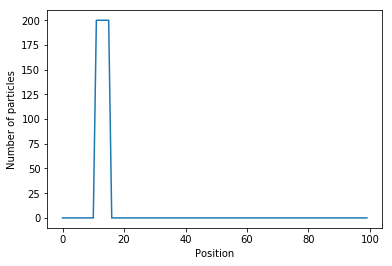

In [6]:
# visualize our starting condition
plt.plot(particles[:, 0])
plt.xlabel('Position')
plt.ylabel('Number of particles')

In [3]:
# simulate random walks
t0 = timeit.default_timer()
for t in range(1, num_time_steps):
    # for each particle in each site, randomly move it left or right
    for site in range(num_sites):
        num_particles_at_site = particles[site, t - 1]
        if num_particles_at_site == 0:
            continue
        if site == 0:
            # move all particles right
            particles[site + 1, t] += num_particles_at_site
        elif site == num_sites - 1:
            # move all particles left
            particles[site - 1, t] += num_particles_at_site
        else:
            # get a random number for each particle for deciding if it moves left or right
            rand_bools = np.random.rand(num_particles_at_site) >= prob_to_step_right
            num_moving_left = np.where(rand_bools == False)[0].size
            num_moving_right = num_particles_at_site - num_moving_left
            particles[site - 1, t] += num_moving_left
            particles[site + 1, t] += num_moving_right
t1 = timeit.default_timer()
print(t1 - t0, "sec")

0.6951687269999987 sec


In [4]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',

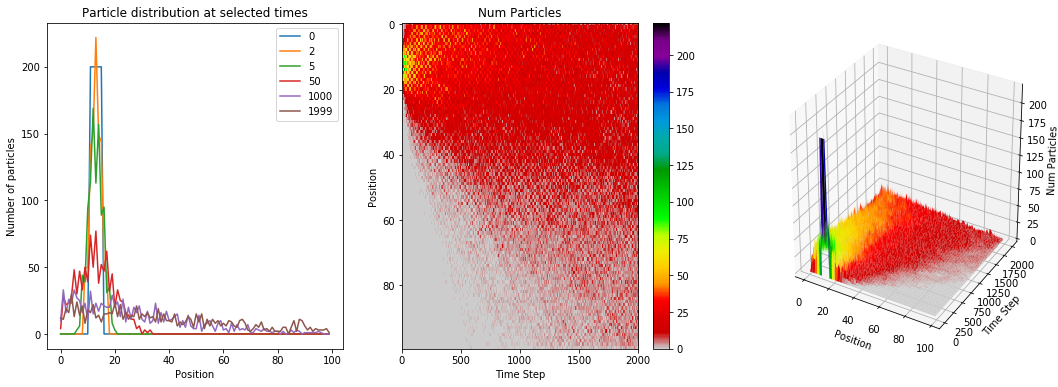

In [7]:
# plot simulation results
fig = plt.figure(figsize=(18, 6))

# plot distribution of particle positions colored by timestep
# Only plot a few of the timesteps, otherwise graphics will bog down.
ax = fig.add_subplot(1, 3, 1)  # (rows, cols, index)
time_steps = [0, 2, 5, 50, 1000, num_time_steps - 1]
for t in time_steps:
    ax.plot(particles[:, t])
ax.set_xlabel('Position')
ax.set_ylabel('Number of particles')
ax.set_title('Particle distribution at selected times')
ax.legend(time_steps)

# plot particle distribution vs. time as a 2d colormap
ax = fig.add_subplot(1, 3, 2)
p = ax.imshow(particles, aspect='auto', cmap=mpl.cm.nipy_spectral_r)  # auto aspect stretches the matrix to fill the available space
ax.set_ylabel('Position')  # row -> y
ax.set_xlabel('Time Step')  # col -> x
ax.set_title('Num Particles')
plt.colorbar(p)  # p is the handle to the plot object above

# plot particle distribution vs. time as a 3d surface
ax = fig.add_subplot(1, 3, 3, projection='3d')
xx, tt = np.meshgrid(range(particles.shape[0]), range(particles.shape[1]), indexing='ij')  # matrices of position and time values
ax.plot_surface(xx, tt, particles, cmap=mpl.cm.nipy_spectral_r)
ax.set_xlabel('Position')
ax.set_ylabel('Time Step')
ax.set_zlabel('Num Particles');

As time progresses particles spread out to become uniformly distributed.

# Example #2. Discrete random walk in two dimensions
Write a program simulating a two-dimensional random walk amongst 100x100 discrete sites with 1000 independent particles initially distributed uniformly at sites 11-12 in each dimension with 25% probability to step in each direction and reflecting boundaries. Use plots to visually convey what is going on.

![](img/random_walk_2d.gif)

In [31]:
num_sites_x = 100
num_sites_y = 100
num_particles = 1000

# particles is a 3d array where particles[t,x,y] is the number of particles at time t at position (x,y).
# For now, we'll initialize only a single time step for the starting condition.
particles = np.zeros((1, num_sites_x, num_sites_y), dtype=int)

# start particles off in sites 11-12
assert num_particles % 4 == 0  # make sure that num_particles is mult of 4
particles[0, 11:13, 11:13] = num_particles / 4

In [33]:
# Allocate memory for additional time steps.
next_time_step = particles.shape[0]  # size of 1st dimension of particles array
num_time_steps = 1000  # number of additional time steps to simulate
new_memory = np.zeros((num_time_steps, num_sites_x, num_sites_y), dtype=int)
particles = np.concatenate((particles, new_memory), axis=0)

# simulate random walks starting at next_time_step for an additional num_time_steps
t0 = timeit.default_timer()
for t in range(next_time_step, next_time_step + num_time_steps):
    # for each particle in each site, randomly move it left, right, up or down
    for x in range(num_sites_x):
        for y in range(num_sites_y):
            num_particles_at_site = particles[t - 1, x, y]
            if num_particles_at_site == 0:
                continue
            # get a random number for each particle
            rand_nums = np.random.rand(num_particles_at_site)
            for  r in rand_nums:
                if r < 0.25:  # move left
                    particles[t, (x - 1 if x > 0 else x + 1), y] += 1
                elif r < 0.5:  # move right
                    particles[t, (x + 1 if x + 1 < num_sites_x else x - 1), y] += 1
                elif r < 0.75:  # move up
                    particles[t, x, (y + 1 if y + 1 < num_sites_y else y - 1)] += 1
                else:  # move down
                    particles[t, x, (y - 1 if y > 0 else y + 1)] += 1
t1 = timeit.default_timer()
print(t1 - t0, "sec")
particles.shape

5.696634941999946 sec


(2001, 100, 100)

In [45]:
# function for plotting 3d surface with x and y values set to the indexes of the matrix z[x, y]
# this is so we don't need to bother calling meshgrid each time
def plot_surface(axes, z, cmap=mpl.cm.nipy_spectral_r):
    xx, yy = np.meshgrid(range(z.shape[0]), range(z.shape[1]), indexing='ij')
    ax.plot_surface(xx, yy, particles[t, :, :], cmap=cmap)

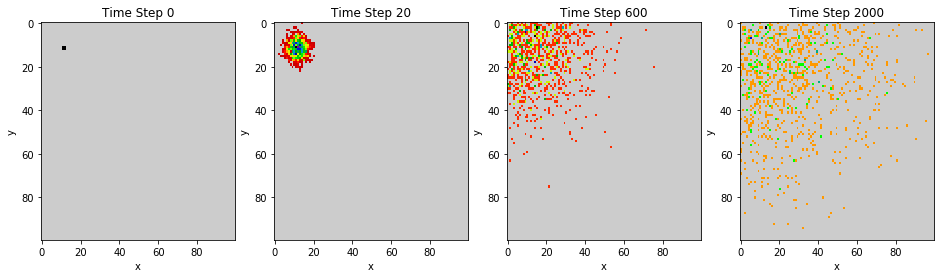

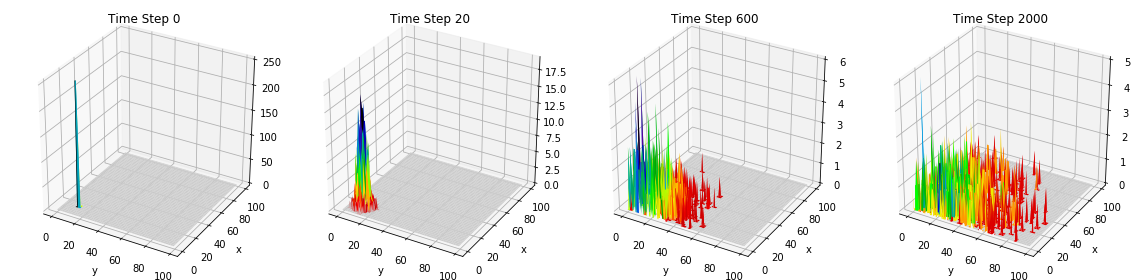

In [47]:
# plot simulation results

# select 4 time steps corresponding to 0%, 1%, 30% and 100% of the simulated time steps
num_time_steps = particles.shape[0]
time_steps = [int(x * (num_time_steps - 1)) for x in [0, 0.01, 0.3, 1]]

# get the min and max of all your data
_min, _max = np.amin(particles), np.amax(particles)

# plot 4 side-by-side image maps at selected time points
fig = plt.figure(figsize=(16, 4))
for (i, t) in enumerate(time_steps):
    ax = fig.add_subplot(1, len(time_steps), i + 1)
    ax.imshow(particles[t, :, :], aspect='auto', cmap=mpl.cm.nipy_spectral_r)  #, vmin = _min, vmax = _max)
    ax.set_ylabel('y')  # row -> y
    ax.set_xlabel('x')  # col -> x
    ax.set_title("Time Step " + str(t))

# plot 4 side-by-side 2d surfaces at selected time points
fig = plt.figure(figsize=(16, 4))
for (i, t) in enumerate(time_steps):
    ax = fig.add_subplot(1, len(time_steps), i + 1, projection='3d')
    plot_surface(ax, particles[t, :, :])
    ax.set_ylabel('x') 
    ax.set_xlabel('y')
    ax.set_title("Time Step " + str(t))
fig.tight_layout();  # helps improve margins between plots

As time progresses particles spread out to become uniformly distributed.

# Example #3. Continuous random walk in three dimensions
Write a program simulating a three-dimensional random walk in a continuous space. Let 1000 independent particles all start at random positions within a cube with corners at (0,0,0) and (1,1,1). At each time step each particle will move in a random direction by a random amount between 0-1. Use plots to visually convey what is going on. Draw the path for a single particle.

In [48]:
num_particles = 1000
num_time_steps = 2000

# particles[i, :, t] = [x, y, z] coordinates for ith particle at time t
particles = np.zeros((num_particles, 3, num_time_steps))
particles[:, :, 0] = np.random.rand(num_particles, 3)  # random values in [0,1) for first time step

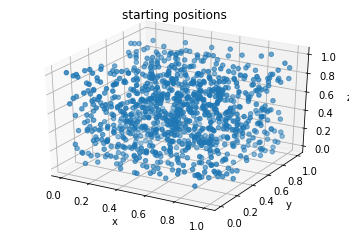

In [49]:
# plot particle starting positions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = particles[:, 0, 0]
y = particles[:, 1, 0]
z = particles[:, 2, 0]
ax.scatter(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('starting positions');

In [50]:
# simulate random walks
t0 = timeit.default_timer()
for t in range(1, num_time_steps):
    # get random x, y, z values for each particle to jump
    # d = sqrt(x**2 + y**2 + z**2)
    # to keep d <= 1, limit x, y and z each to <= 1/sqrt(3)
    # to get random numbers in [-0.5, 0.5] we first get random numbers in [0, 1], then subtract 0.5 and multiply by 2
    jumps = (np.random.rand(num_particles, 3) - 0.5) * 2 / np.sqrt(3)  # jumps[i, :] = [dx, dy, dz] distances for ith particle
    particles[:, :, t] = particles[:, :, t - 1] + jumps
t1 = timeit.default_timer()
print(t1 - t0, "sec")

0.17660704999980226 sec


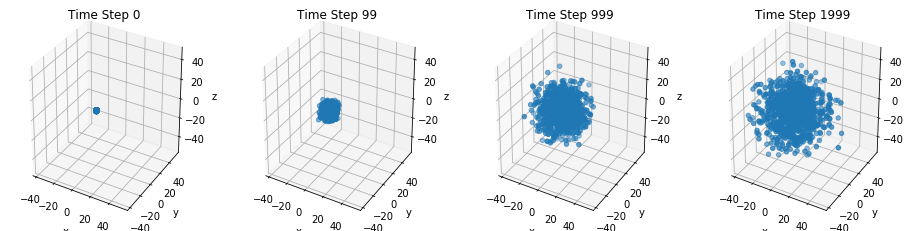

In [51]:
# plot simulation results
fig = plt.figure(figsize=(16, 4))

# select 4 time steps corresponding to 0%, 5%, 50% and 100% of the simulated time steps
time_steps = [int(x * (num_time_steps - 1)) for x in [0, 0.05, 0.5, 1]]

# get the bounds for all of your data
xmin, xmax = np.amin(particles[:, 0, :]), np.amax(particles[:, 0, :])
ymin, ymax = np.amin(particles[:, 1, :]), np.amax(particles[:, 1, :])
zmin, zmax = np.amin(particles[:, 2, :]), np.amax(particles[:, 2, :])

# plot particle positions at each of the selected time steps
for i, t in enumerate(time_steps):
    ax = fig.add_subplot(1, len(time_steps), i + 1, projection='3d')
    x = particles[:, 0, t]
    y = particles[:, 1, t]
    z = particles[:, 2, t]
    ax.scatter(x, y, z)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_zlim(zmin, zmax)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title("Time Step " + str(t))

As time progresses particles continue to spread further and further apart.

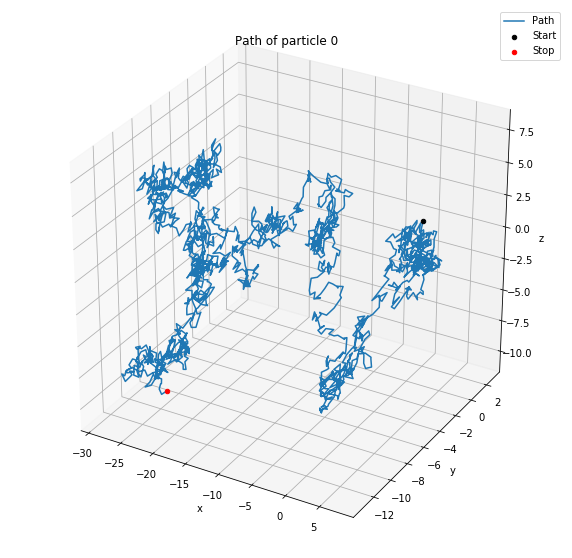

In [52]:
# plot path of first particle throughout simulation
i = 0  # particle index
x = particles[i, 0, :]  # x coords of ith particle for all time points
y = particles[i, 1, :]  # y coords of ith particle for all time points
z = particles[i, 2, :]  # z coords of ith particle for all time points

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')   # a single plot
ax.plot(x, y, z)
ax.scatter(x[0], y[0], z[0], 'o', color='black')  # starting point
ax.scatter(x[-1], y[-1], z[-1], 'o', color='red')  # ending point
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Path of particle " + str(i))
ax.legend(['Path', 'Start', 'Stop']);

# Problem #1. Using only the particles array from the simulation in example #3, find the minimum, maximum, mean and variance for the jump distances of all particles throughout the entire simulation. (3 pts)

# Problem #2. Plot a histogram of the jump distances of all particles throughout the entire simulation in example #3. (3 pts)

# Problem #3. Repeat example #2 for a discrete 2D random walk, but make the probabilities of going in each direction unequal and also make it so that if a particle moves off of one edge it enters on the opposite edge. (5 pts)

# Problem #4. Repeat Example #3 for a continuous 3D random walk, but confine the particles to a unit cell of dimension 10x10x10. Make it so that if a particle leaves one edge, it enters on the opposite edge (this is the sort of thing most molecular dynamics simulations do). (3 pts)

# Problem #5. Simulate a continuous 3D random walk for a 10x10x10 box of particles that starts off with a particle on each unit step in all dimensions. On each time step each particle will move in a random direction by a random amount that cannot be greater than the distance between that particle and its nearest neighbor. (5 pts)